## 1- Chargement des librairies et du jeu de données initial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Fires_filter.csv', index_col = 'OBJECTID')
df.DISCOVERY_DATE = pd.to_datetime(df.DISCOVERY_DATE)
df.CONT_DATE = pd.to_datetime(df.CONT_DATE)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880465 entries, 1 to 1880465
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FIRE_NAME         object        
 1   FIRE_YEAR         int64         
 2   DISCOVERY_DATE    datetime64[ns]
 3   DISCOVERY_DOY     int64         
 4   DISCOVERY_TIME    float64       
 5   STAT_CAUSE_CODE   float64       
 6   STAT_CAUSE_DESCR  object        
 7   CONT_DATE         datetime64[ns]
 8   CONT_DOY          float64       
 9   CONT_TIME         float64       
 10  FIRE_SIZE         float64       
 11  FIRE_SIZE_CLASS   object        
 12  LATITUDE          float64       
 13  LONGITUDE         float64       
 14  STATE             object        
 15  COUNTY            object        
 16  FIPS_CODE         float64       
 17  FIPS_NAME         object        
dtypes: datetime64[ns](2), float64(8), int64(2), object(6)
memory usage: 272.6+ MB


In [4]:
df.STAT_CAUSE_DESCR.unique()

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Children', 'Railroad', 'Smoking',
       'Powerline', 'Structure', 'Fireworks', 'Missing/Undefined'],
      dtype=object)

## 2- Préparation d'un jeu de données dédié au suivi des causes de feux

In [5]:
df_cause = df[['DISCOVERY_DATE', 'STAT_CAUSE_DESCR']]
df_cause = df_cause.merge(pd.get_dummies(df_cause.STAT_CAUSE_DESCR), on = 'OBJECTID')
df_cause.drop('STAT_CAUSE_DESCR', axis = 1, inplace = True)
df_cause

,DISCOVERY_DATE,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Missing/Undefined,Powerline,Railroad,Smoking,Structure
OBJECTID,,,,,,,,,,,,,,
1,2005-02-02,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2004-05-12,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2004-05-31,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2004-06-28,0,0,0,0,0,0,1,0,0,0,0,0,0
5,2004-06-28,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880461,2015-09-26,0,0,0,0,0,0,0,0,1,0,0,0,0
1880462,2015-10-05,0,0,0,0,0,0,0,1,0,0,0,0,0
1880463,2015-05-02,0,0,0,0,0,0,0,0,1,0,0,0,0


In [6]:
df_cause.reset_index(inplace = True)
df_cause.drop('OBJECTID', axis =1, inplace = True)
df_cause.set_index('DISCOVERY_DATE', inplace = True)
df_cause

,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Missing/Undefined,Powerline,Railroad,Smoking,Structure
DISCOVERY_DATE,,,,,,,,,,,,,
2005-02-02,0,0,0,0,0,0,0,1,0,0,0,0,0
2004-05-12,0,0,0,0,0,0,1,0,0,0,0,0,0
2004-05-31,0,0,0,1,0,0,0,0,0,0,0,0,0
2004-06-28,0,0,0,0,0,0,1,0,0,0,0,0,0
2004-06-28,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-26,0,0,0,0,0,0,0,0,1,0,0,0,0
2015-10-05,0,0,0,0,0,0,0,1,0,0,0,0,0
2015-05-02,0,0,0,0,0,0,0,0,1,0,0,0,0


Echantillonage à la semaine avec somme des indicateurs journaliers

In [7]:
df_cause = df_cause.resample('W').sum()
df_cause

,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Missing/Undefined,Powerline,Railroad,Smoking,Structure
DISCOVERY_DATE,,,,,,,,,,,,,
1992-01-05,87.0,3.0,18.0,43.0,32.0,1.0,2.0,29.0,81.0,0.0,23.0,11.0,0.0
1992-01-12,155.0,16.0,23.0,187.0,73.0,0.0,1.0,38.0,127.0,0.0,77.0,36.0,0.0
1992-01-19,163.0,9.0,39.0,160.0,73.0,0.0,0.0,103.0,219.0,0.0,54.0,46.0,0.0
1992-01-26,288.0,18.0,62.0,381.0,93.0,0.0,1.0,97.0,226.0,0.0,75.0,53.0,0.0
1992-02-02,199.0,16.0,57.0,325.0,56.0,0.0,0.0,68.0,175.0,1.0,54.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-06,38.0,12.0,5.0,95.0,23.0,1.0,5.0,124.0,65.0,7.0,0.0,3.0,1.0
2015-12-13,63.0,14.0,3.0,157.0,45.0,0.0,5.0,199.0,67.0,18.0,2.0,18.0,8.0
2015-12-20,37.0,7.0,6.0,71.0,27.0,0.0,0.0,114.0,46.0,8.0,0.0,9.0,1.0


Tests de visualisation de l'évolution à la semaine + la moyenne glissante

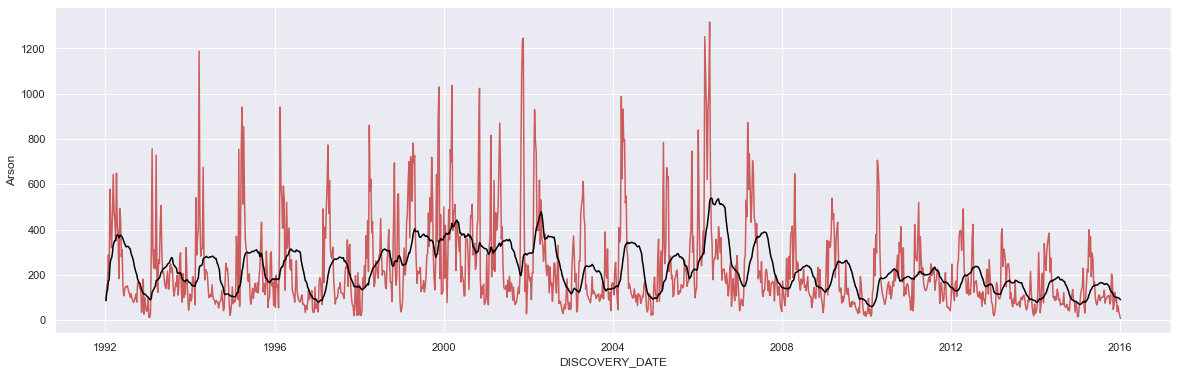

In [8]:
plt.figure(figsize = (20,6)) 
sns.lineplot(x = df_cause.index, y = df_cause.Arson, ls = '-', color = 'indianred')
sns.lineplot(x = df_cause.index, y = df_cause.Arson.rolling(26, min_periods=1).mean(), ls = '-', color = 'black');

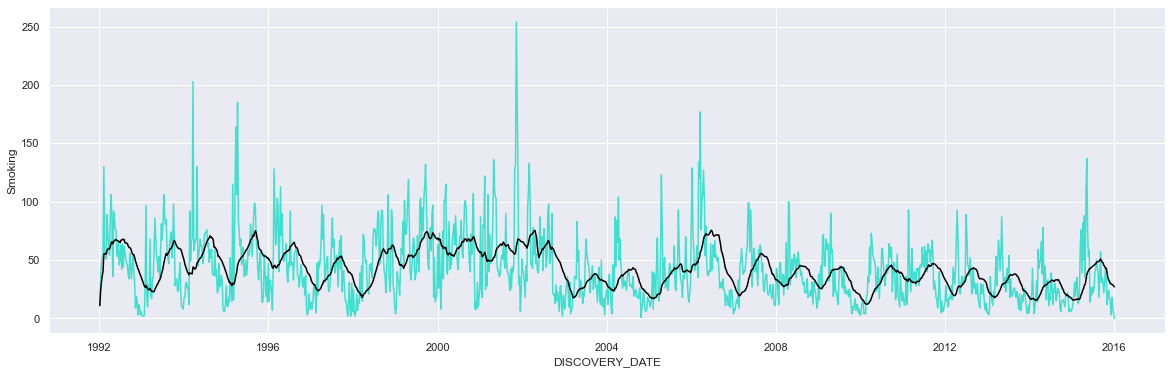

In [9]:
plt.figure(figsize = (20,6)) 
sns.lineplot(x = df_cause.index, y = df_cause.Smoking, ls = '-', color = 'turquoise')
sns.lineplot(x = df_cause.index, y = df_cause.Smoking.rolling(26, min_periods=1).mean(), ls = '-', color = 'black');

## 3- Affichage de l'évolution des causes de feux au file du temps

Liste avec les causes de feux

In [10]:
causes = df_cause.columns
causes

Index(['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use',
       'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined',
       'Powerline', 'Railroad', 'Smoking', 'Structure'],
      dtype='object')

Liste de couleurs pour différencier les tracés

In [11]:
list_col = ['lightcoral', 'maroon', 'darkorange', 'goldenrod', 'olive', 'palegreen', 'darkgreen', 'turquoise', 'teal', 'steelblue', 'slategray', 'royalblue', 'indigo', 'purple', 'crimsom', 'black']

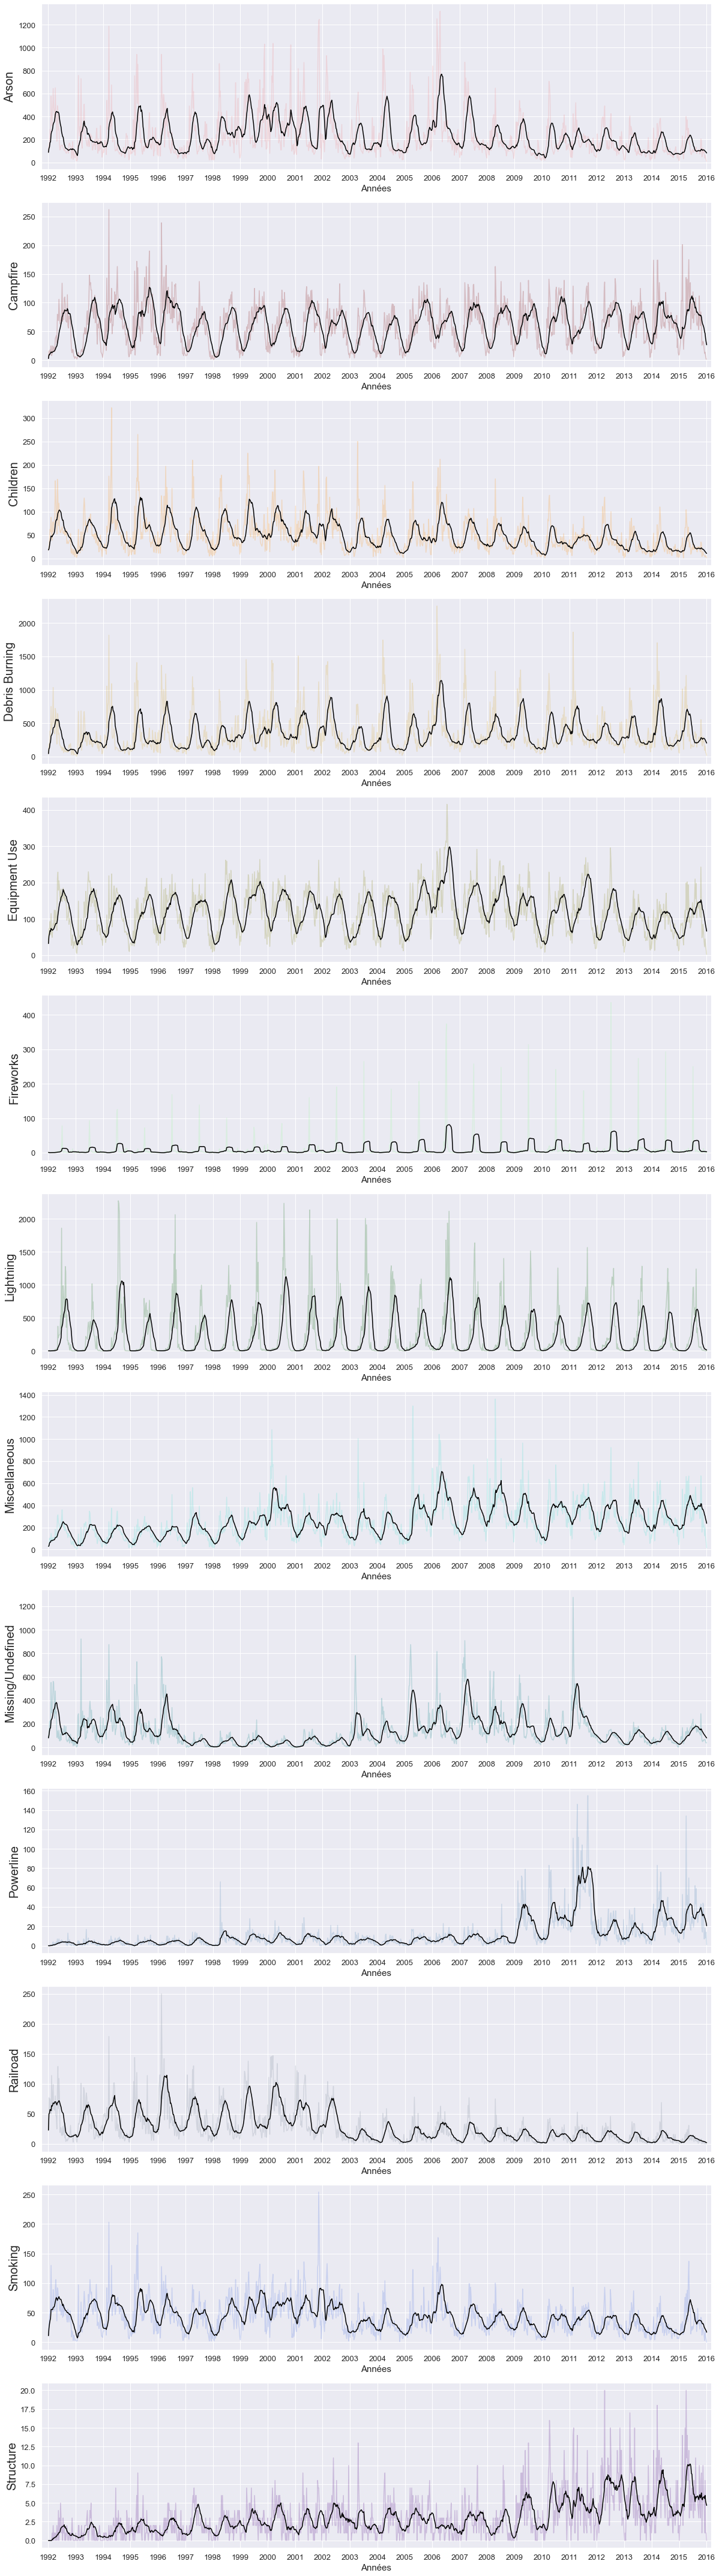

In [13]:
import matplotlib.dates as md
import datetime

fig, axs = plt.subplots(nrows = 13, figsize = (20, 6*13))
for i in range(len(causes)):
    sns.lineplot(x = df_cause.index, y = df_cause.loc[:, causes[i]], ls = '-', alpha = 0.2, color = list_col[i], ax = axs[i])
    sns.lineplot(x = df_cause.index, y = df_cause.loc[:, causes[i]].rolling(12, min_periods=1).mean(), ls = '-', color = 'black', ax = axs[i])
    axs[i].set_xlabel("Années",fontsize=15)
    axs[i].set_ylabel(causes[i],fontsize=20)
    axs[i].xaxis.set_major_locator(md.YearLocator())
    axs[i].xaxis.set_major_formatter(md.DateFormatter('%Y'))
    axs[i].set_xlim([datetime.date(1991, 10, 1), datetime.date(2016, 3, 1)])
    axs[i].tick_params(labelsize=13)